<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-07 23:31:21.840144


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

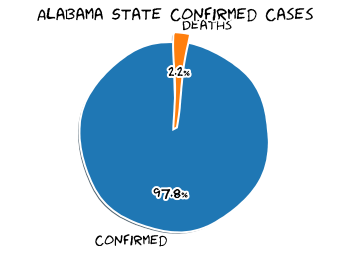

Alabama State Total Population
4887871
Alabama State Confirmed
44878 (0.9181502539653768% of population)
Alabama State Deaths
1007 (2.243861134631668% of confirmed)



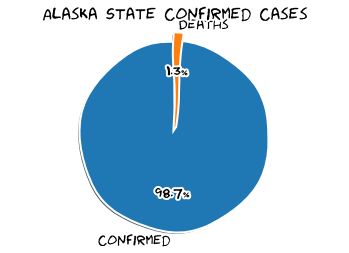

Alaska State Total Population
737438
Alaska State Confirmed
1162 (0.1575725688125646% of population)
Alaska State Deaths
15 (1.2908777969018932% of confirmed)



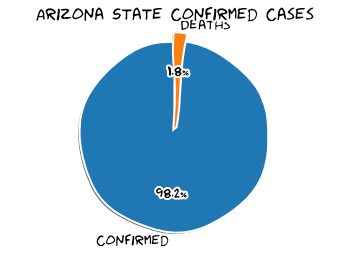

Arizona State Total Population
7171646
Arizona State Confirmed
101455 (1.4146682644402693% of population)
Arizona State Deaths
1829 (1.8027697008525947% of confirmed)



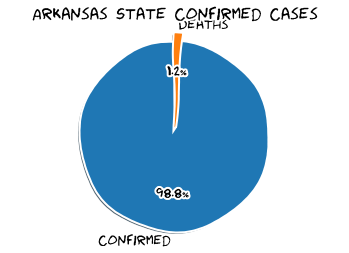

Arkansas State Total Population
3013825
Arkansas State Confirmed
24253 (0.8047248927857458% of population)
Arkansas State Deaths
292 (1.2039747660083289% of confirmed)



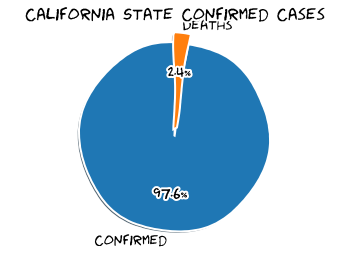

California State Total Population
39557045
California State Confirmed
273662 (0.6918160848465804% of population)
California State Deaths
6460 (2.360576185221185% of confirmed)



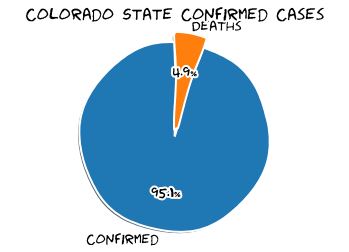

Colorado State Total Population
5695564
Colorado State Confirmed
34240 (0.6011696119997949% of population)
Colorado State Deaths
1691 (4.938668224299065% of confirmed)



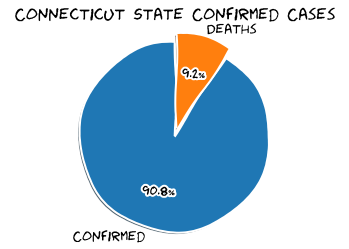

Connecticut State Total Population
3572665
Connecticut State Confirmed
46976 (1.314872791039742% of population)
Connecticut State Deaths
4338 (9.23450272479564% of confirmed)



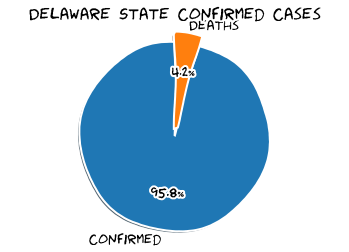

Delaware State Total Population
967171
Delaware State Confirmed
12293 (1.2710265299517873% of population)
Delaware State Deaths
512 (4.164971935247702% of confirmed)



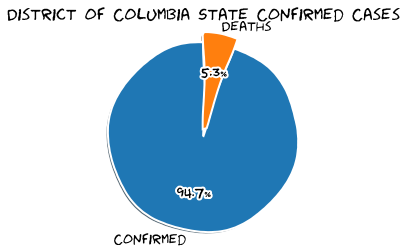

District of Columbia State Total Population
702455
District of Columbia State Confirmed
10569 (1.5045803645785139% of population)
District of Columbia State Deaths
561 (5.307976156684644% of confirmed)



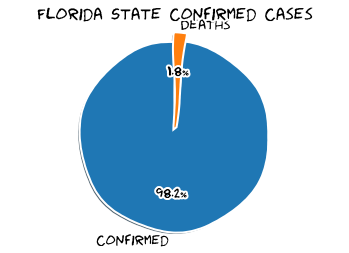

Florida State Total Population
21299325
Florida State Confirmed
213773 (1.0036609141369504% of population)
Florida State Deaths
3840 (1.7962979422097272% of confirmed)



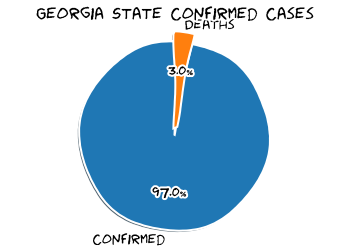

Georgia State Total Population
10519475
Georgia State Confirmed
97064 (0.9227076446305543% of population)
Georgia State Deaths
2878 (2.965053984999588% of confirmed)



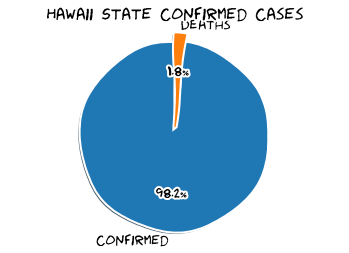

Hawaii State Total Population
1420491
Hawaii State Confirmed
1030 (0.07251013909979014% of population)
Hawaii State Deaths
19 (1.8446601941747571% of confirmed)



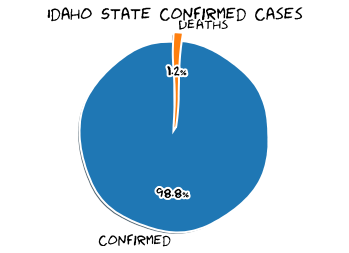

Idaho State Total Population
1754208
Idaho State Confirmed
8052 (0.45901056203141244% of population)
Idaho State Deaths
94 (1.167411823149528% of confirmed)



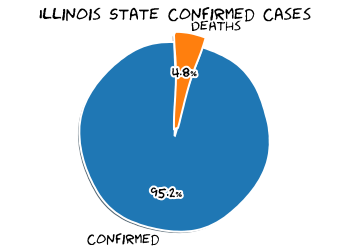

Illinois State Total Population
12741080
Illinois State Confirmed
147865 (1.160537411271258% of population)
Illinois State Deaths
7026 (4.751631555811044% of confirmed)



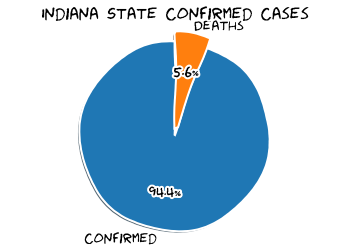

Indiana State Total Population
6691878
Indiana State Confirmed
48524 (0.7251178219327967% of population)
Indiana State Deaths
2698 (5.560135190833402% of confirmed)



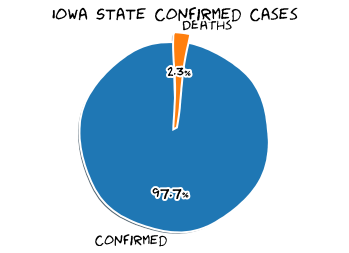

Iowa State Total Population
3156145
Iowa State Confirmed
31906 (1.0109167988162775% of population)
Iowa State Deaths
725 (2.2722998809001442% of confirmed)



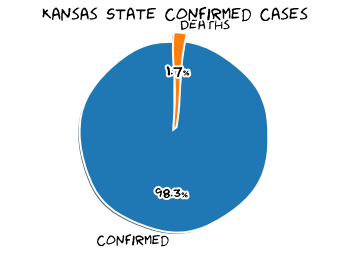

Kansas State Total Population
2911510
Kansas State Confirmed
16729 (0.574581574509447% of population)
Kansas State Deaths
285 (1.7036284296730229% of confirmed)



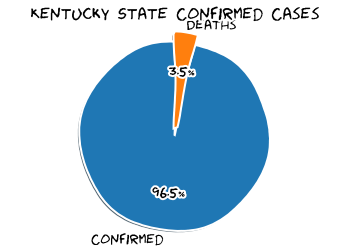

Kentucky State Total Population
4468402
Kentucky State Confirmed
17152 (0.38385087107202975% of population)
Kentucky State Deaths
593 (3.4573227611940296% of confirmed)



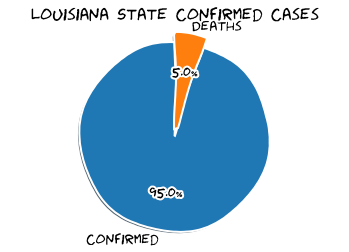

Louisiana State Total Population
4659978
Louisiana State Confirmed
66327 (1.423332899854892% of population)
Louisiana State Deaths
3296 (4.969318678667813% of confirmed)



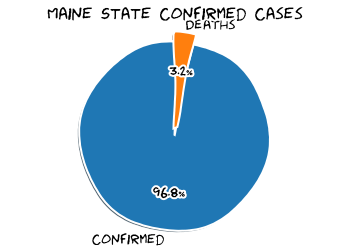

Maine State Total Population
1338404
Maine State Confirmed
3423 (0.25575237372273246% of population)
Maine State Deaths
109 (3.1843412211510373% of confirmed)



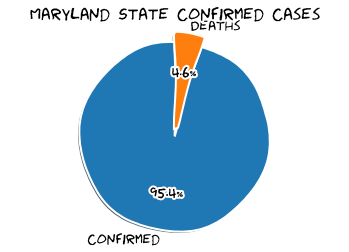

Maryland State Total Population
6042718
Maryland State Confirmed
70396 (1.1649724511387094% of population)
Maryland State Deaths
3239 (4.601113699642025% of confirmed)



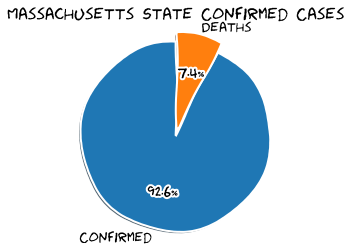

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
110137 (1.595691428857882% of population)
Massachusetts State Deaths
8198 (7.443456785639703% of confirmed)



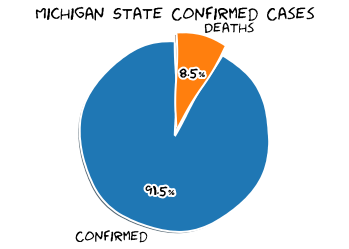

Michigan State Total Population
9995915
Michigan State Confirmed
73267 (0.732969418007256% of population)
Michigan State Deaths
6221 (8.490862188980032% of confirmed)



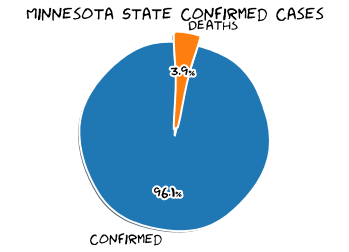

Minnesota State Total Population
5611179
Minnesota State Confirmed
38569 (0.687360000456232% of population)
Minnesota State Deaths
1511 (3.917654074515803% of confirmed)



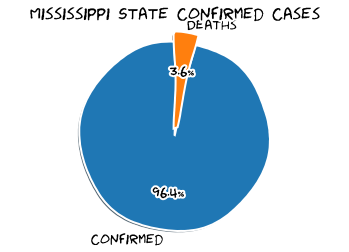

Mississippi State Total Population
2986530
Mississippi State Confirmed
31257 (1.0465992305451477% of population)
Mississippi State Deaths
1114 (3.5640016636273475% of confirmed)



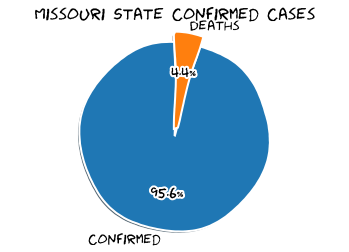

Missouri State Total Population
6126452
Missouri State Confirmed
24346 (0.3973915081681861% of population)
Missouri State Deaths
1060 (4.353897970919247% of confirmed)



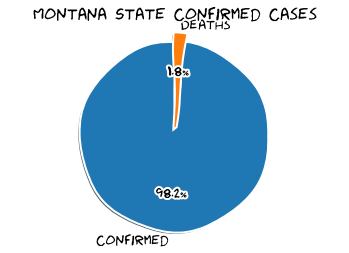

Montana State Total Population
1062305
Montana State Confirmed
1249 (0.11757451955888373% of population)
Montana State Deaths
23 (1.8414731785428344% of confirmed)



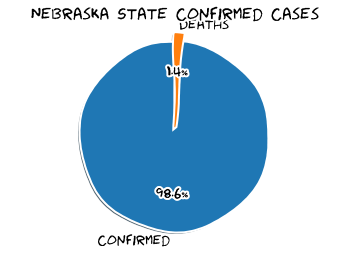

Nebraska State Total Population
1929268
Nebraska State Confirmed
20046 (1.0390469338629988% of population)
Nebraska State Deaths
283 (1.4117529681732017% of confirmed)



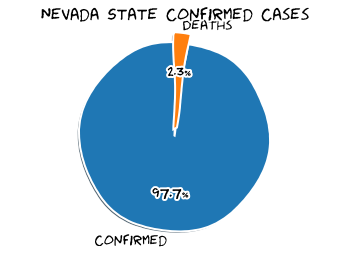

Nevada State Total Population
3034392
Nevada State Confirmed
22909 (0.7549782625316702% of population)
Nevada State Deaths
537 (2.344056920860797% of confirmed)



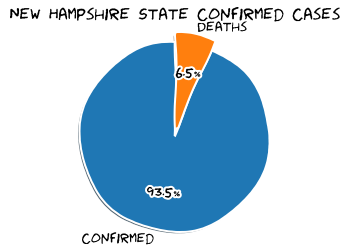

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5914 (0.43598843458477893% of population)
New Hampshire State Deaths
382 (6.459249239093675% of confirmed)



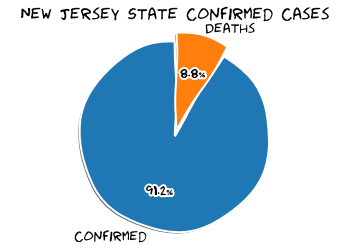

New Jersey State Total Population
8908520
New Jersey State Confirmed
173611 (1.9488197815125297% of population)
New Jersey State Deaths
15229 (8.771909614022153% of confirmed)



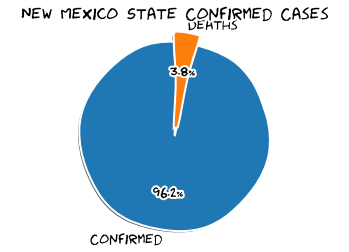

New Mexico State Total Population
2095428
New Mexico State Confirmed
13507 (0.6445938490847694% of population)
New Mexico State Deaths
515 (3.8128377878137263% of confirmed)



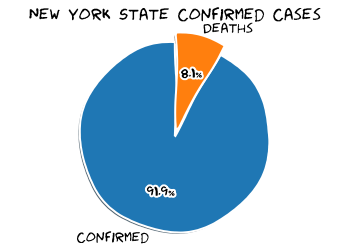

New York State Total Population
19542209
New York State Confirmed
397649 (2.0348211402303598% of population)
New York State Deaths
32219 (8.102371689605658% of confirmed)



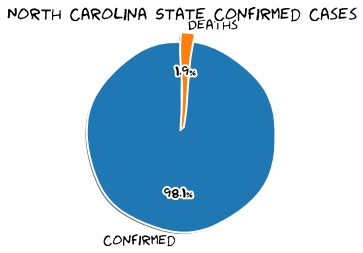

North Carolina State Total Population
10383620
North Carolina State Confirmed
75457 (0.7266926177961058% of population)
North Carolina State Deaths
1436 (1.90307062300383% of confirmed)



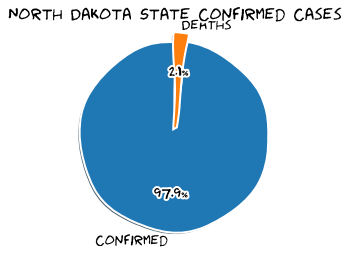

North Dakota State Total Population
760077
North Dakota State Confirmed
3849 (0.5063960625041937% of population)
North Dakota State Deaths
80 (2.0784619381657574% of confirmed)



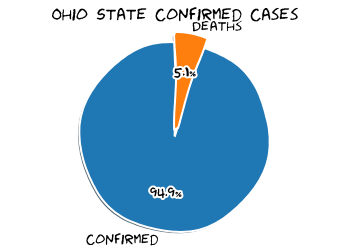

Ohio State Total Population
11689442
Ohio State Confirmed
57956 (0.4957978319238848% of population)
Ohio State Deaths
2927 (5.050383049209746% of confirmed)



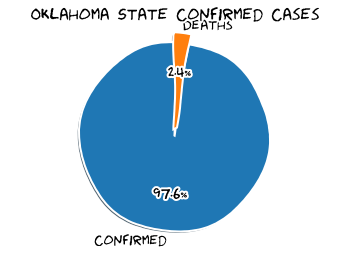

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
16362 (0.41495491213845825% of population)
Oklahoma State Deaths
399 (2.4385771910524388% of confirmed)



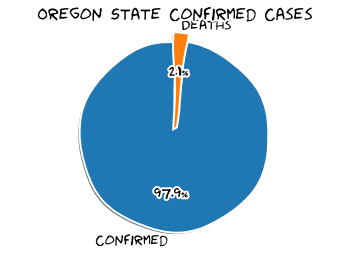

Oregon State Total Population
4190713
Oregon State Confirmed
10395 (0.24804848244200928% of population)
Oregon State Deaths
215 (2.068302068302068% of confirmed)



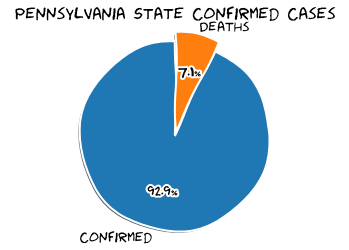

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
95100 (0.7425591822010672% of population)
Pennsylvania State Deaths
6754 (7.101997896950578% of confirmed)



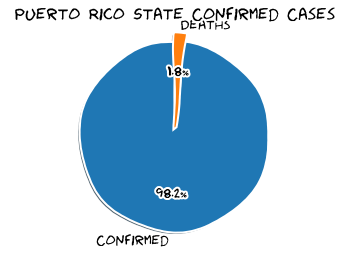

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
8714 (0.27272559404823493% of population)
Puerto Rico State Deaths
157 (1.8016984163415195% of confirmed)



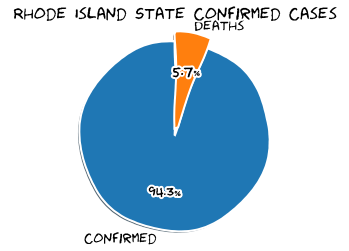

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
16991 (1.606995077152977% of population)
Rhode Island State Deaths
960 (5.650050026484609% of confirmed)



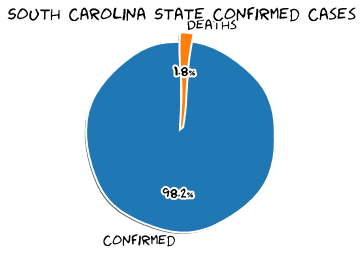

South Carolina State Total Population
5084127
South Carolina State Confirmed
46380 (0.9122510118256291% of population)
South Carolina State Deaths
827 (1.783096162138853% of confirmed)



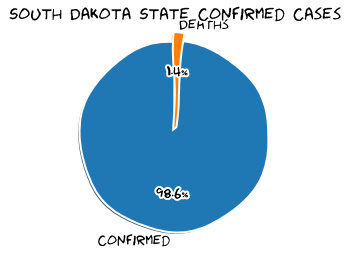

South Dakota State Total Population
882235
South Dakota State Confirmed
7105 (0.8053409805777373% of population)
South Dakota State Deaths
97 (1.3652357494722025% of confirmed)



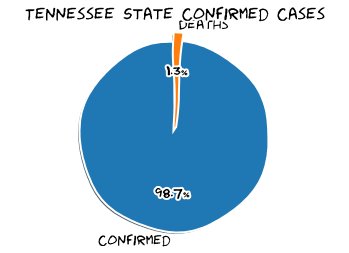

Tennessee State Total Population
6770010
Tennessee State Confirmed
52039 (0.7686694702075773% of population)
Tennessee State Deaths
652 (1.2529064739906608% of confirmed)



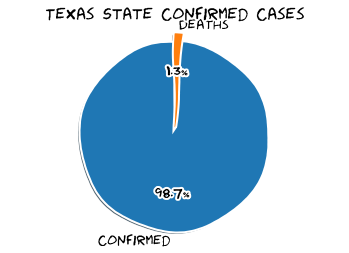

Texas State Total Population
28701845
Texas State Confirmed
205642 (0.7164765888743388% of population)
Texas State Deaths
2677 (1.301776874373912% of confirmed)



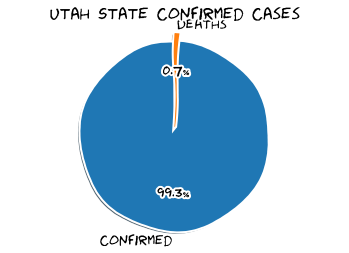

Utah State Total Population
3161105
Utah State Confirmed
25469 (0.805699272880844% of population)
Utah State Deaths
190 (0.7460049471907024% of confirmed)



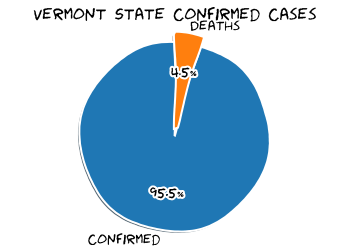

Vermont State Total Population
626299
Vermont State Confirmed
1251 (0.19974485030312994% of population)
Vermont State Deaths
56 (4.476418864908074% of confirmed)



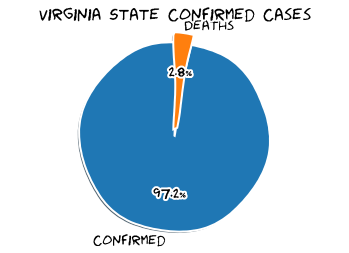

Virginia State Total Population
8517685
Virginia State Confirmed
66738 (0.783522752954588% of population)
Virginia State Deaths
1879 (2.8154874284515565% of confirmed)



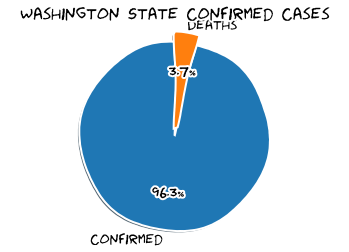

Washington State Total Population
7535591
Washington State Confirmed
36985 (0.4908042381811858% of population)
Washington State Deaths
1369 (3.701500608354739% of confirmed)



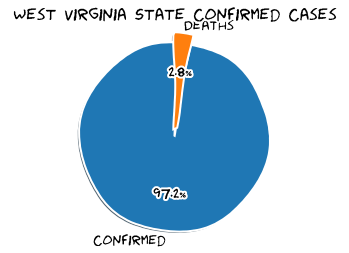

West Virginia State Total Population
1805832
West Virginia State Confirmed
3442 (0.19060466311373372% of population)
West Virginia State Deaths
95 (2.760023242300988% of confirmed)



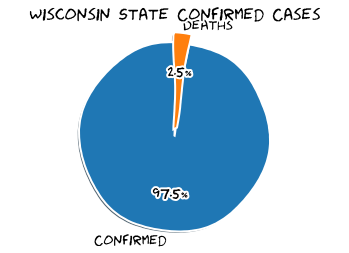

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
32061 (0.5514857657122098% of population)
Wisconsin State Deaths
796 (2.482767224977387% of confirmed)



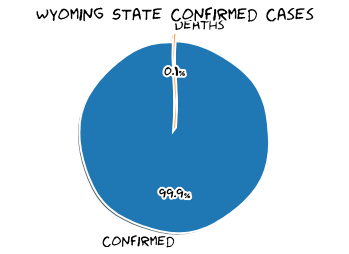

Wyoming State Total Population
577737
Wyoming State Confirmed
1675 (0.2899243081194384% of population)
Wyoming State Deaths
1 (0.05970149253731343% of confirmed)



In [10]:
for i in states:
    state_details(i)

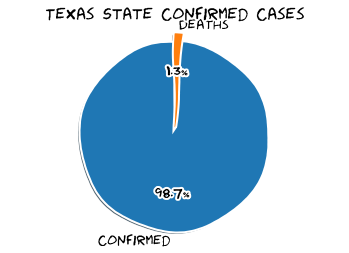

Texas State Total Population
28701845
Texas State Confirmed
205642 (0.7164765888743388% of population)
Texas State Deaths
2677 (1.301776874373912% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2948397
US Deaths
130382

New York City Confirmed
217216
New York City Deaths
23201

Philippines Confirmed
47873
Philippines Deaths
1309



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 11776950},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 542310},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-07-07T22:33:58.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 6405609},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-07-07 04:34:00,34.22333378,-82.46170658,135,0,0,135,"Abbeville, South Carolina, US",550.4138296571126,0.0
1,22001,Acadia,Louisiana,US,2020-07-07 04:34:00,30.2950649,-92.41419698,1042,42,0,1000,"Acadia, Louisiana, US",1679.426222902732,4.030710172744722
2,51001,Accomack,Virginia,US,2020-07-07 04:34:00,37.76707161,-75.63234615,1044,14,0,1030,"Accomack, Virginia, US",3230.5978462681023,1.3409961685823755
3,16001,Ada,Idaho,US,2020-07-07 04:34:00,43.4526575,-116.24155159999998,3000,23,0,2977,"Ada, Idaho, US",622.9404032916171,0.7666666666666667
4,19001,Adair,Iowa,US,2020-07-07 04:34:00,41.33075609,-94.47105874,16,0,0,16,"Adair, Iowa, US",223.71364653243847,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,,,,Yemen,2020-07-07 04:34:00,15.552726999999999,48.516388,1284,345,575,364,Yemen,4.3049734379115545,26.869158878504674
3798,,,,Zambia,2020-07-07 04:34:00,-13.133897,27.849332,1632,30,1348,254,Zambia,8.877305842115812,1.838235294117647
3799,,,,Zimbabwe,2020-07-07 04:34:00,-19.015438,29.154857,734,9,197,528,Zimbabwe,4.938461986659828,1.2261580381471389
3800,41069,Wheeler,Oregon,US,2020-07-06 19:33:59,44.72698162,-120.02814270000002,0,0,0,0,"Wheeler, Oregon, US",0.0,


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594132439000,40.767273,-73.971526,217216,0,23201,194015,New York City,36061,"New York City, New York, US",2605.502796,None,None,84036061,USA
1,California,US,1594132439000,34.308284,-118.228241,116670,0,3537,113133,Los Angeles,06037,"Los Angeles, California, US",1162.155160,None,None,84006037,USA
2,Illinois,US,1594132439000,41.841448,-87.816588,92781,0,4630,88151,Cook,17031,"Cook, Illinois, US",1801.491311,None,None,84017031,USA
3,Arizona,US,1594132439000,33.348359,-112.491815,64915,0,881,64034,Maricopa,04013,"Maricopa, Arizona, US",1447.246564,None,None,84004013,USA
4,Florida,US,1594132439000,25.611236,-80.551706,51058,0,1057,50001,Miami-Dade,12086,"Miami-Dade, Florida, US",1879.246505,None,None,84012086,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,Kansas,US,1594132439000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3079,West Virginia,US,1594132439000,38.493709,-80.420202,1,0,0,1,Webster,54101,"Webster, West Virginia, US",12.324378,None,None,84054101,USA
3080,Wyoming,US,1594132439000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA
3081,Montana,US,1594132439000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594132439000,40.767273,-73.971526,217216,0,23201,194015,New York City,36061,"New York City, New York, US",2605.502796,None,None,84036061,USA
5,New York,US,1594132439000,40.740665,-73.589419,42053,0,2187,39866,Nassau,36059,"Nassau, New York, US",3099.141883,None,None,84036059,USA
6,New York,US,1594132439000,40.883201,-72.801217,41685,0,1984,39701,Suffolk,36103,"Suffolk, New York, US",2823.037503,None,None,84036103,USA
8,New York,US,1594132439000,41.162784,-73.757417,35084,0,1427,33657,Westchester,36119,"Westchester, New York, US",3626.230742,None,None,84036119,USA
36,New York,US,1594132439000,41.150279,-74.025605,13656,0,668,12988,Rockland,36087,"Rockland, New York, US",4191.670069,None,None,84036087,USA
51,New York,US,1594132439000,41.403375,-74.302408,10781,0,484,10297,Orange,36071,"Orange, New York, US",2800.696212,None,None,84036071,USA
79,New York,US,1594132439000,42.762490,-78.730637,7500,0,639,6861,Erie,36029,"Erie, New York, US",816.369182,None,None,84036029,USA
129,New York,US,1594132439000,41.764861,-73.743567,4246,0,152,4094,Dutchess,36027,"Dutchess, New York, US",1443.147598,None,None,84036027,USA
142,New York,US,1594132439000,43.146389,-77.693229,3974,0,273,3701,Monroe,36055,"Monroe, New York, US",535.745582,None,None,84036055,USA
179,New York,US,1594132439000,43.004919,-76.199712,2963,0,188,2775,Onondaga,36067,"Onondaga, New York, US",643.391933,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

397649

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1594132439000,40.767273,-73.971526,217216,0,23201,194015,New York City,36061,"New York City, New York, US",2605.502796,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
53,None,Philippines,1594161238000,12.879721,121.774017,47873,12386,1309,34178.0,None,None,Philippines,43.687284,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
